<a href="https://colab.research.google.com/github/sturu1/Mon-AM/blob/master/2020_07_27_%EC%98%A4%EC%A0%84%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Funtional API를 사용하기 위한 기본 Setup
외워야함. 익히면 편함

https://chloevan.github.io/python/tensorflow2.0/ch8_2_transfer_learning/

In [81]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#sequential 을 Funtional로 바꿀수잇어야함
#shape (32, 32, 3) (x, y , 채널)
#784는 28 * 28 을 펼쳐  놓은것
#funtional은 input 데이터 모양은 정해져야한다. 
#epoch는 책1권, batch_size는 1단원, Dense ,  중간층엔 activation 이  ,출력 activation 은  

(None, 784) <dtype: 'float32'>
Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


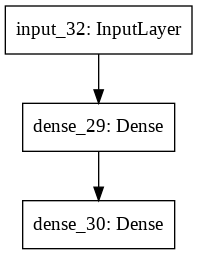

In [82]:
#Funtional API를 사용하려면 
#우선  input node를 항상 먼저 설정해줘야한다.
inputs = keras.Input(shape=(784, ))#입력 노드
print(inputs.shape, inputs.dtype)

dense = layers.Dense(64, activation='relu')#은닉층 노드
x = dense(inputs)
outputs = layers.Dense(10)(x)#출력 노드
#=======그래프모델이 정의됨

model = keras.Model(inputs = inputs, outputs = outputs, name = 'mnist_model')#처음inputs , outputs는 변수이다. 뒤에꺼는 입력노드, 출력노드이다.
model.summary()

keras.utils.plot_model(model, "my_first_model.png")#그래프로 가시화

# 트레이닝, 평가, 추론

1. 트레이닝, 평가, 추론 작업은 Sequential 모델링 방법과 동일하게 사용가능
2. MNIST로딩, 벡터 reshape, 모델fit, evaluation순이다.

In [83]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = keras.optimizers.RMSprop(),
              metrics = ["accuracy"])

history = model.fit(x_train, y_train, batch_size = 64, epochs = 2, validation_split = 0.2)

test_scores = model.evaluate(x_test, y_test, verbose = 2)
print("test loss", test_scores[0])
print("test accuracy", test_scores[1])

Epoch 1/2
750/750 [==============================] - 2s 2ms/step - loss: 0.3609 - accuracy: 0.9020 - val_loss: 0.2182 - val_accuracy: 0.9376
Epoch 2/2
750/750 [==============================] - 2s 2ms/step - loss: 0.1866 - accuracy: 0.9461 - val_loss: 0.1606 - val_accuracy: 0.9542
313/313 - 0s - loss: 0.1573 - accuracy: 0.9537
test loss 0.1572512984275818
test accuracy 0.9537000060081482


# 모델 저장(save) 및 직렬화(serialize)

1. 저장된 파일은 아래와 같은 정보들로 저장됨
*  model architecture
*  model weight values
*  model training config
*  optimizer and its state 

In [84]:
model.save("path_to_my_model")

model = keras.models.load_model("path_to_my_model")

model.summary()

INFO:tensorflow:Assets written to: path_to_my_model/assets
Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# 여러개의 모델정의를 위해 같은 그래프레이어 사용하기

* 전체 오토인코더 모델에서 인코더 모델과 오토인코더모델 두 개의 모델 생성해보기

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#encoder start
encoder_input = keras.Input(shape = (28, 28, 1), name = "img")
x = layers.Conv2D(16, 3, activation = 'relu')(encoder_input)
x = layers.Conv2D(32, 3, activation = 'relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation = 'relu')(x)
x = layers.Conv2D(16, 3, activation = 'relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)
#decoder start
x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation =  'relu')(x)
x = layers.Conv2DTranspose(32, 3, activation =  'relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation =  'relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation = 'relu')(x)

#model1
encoder = keras.Model(encoder_input, encoder_output, name = "encoder")
encoder.summary()

#model2
autoencoder = keras.Model(encoder_input, decoder_output, name = "autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_8 (Glob (None, 16)                0   

#모델의 중첩: 앙상블 모델 구현 가능

* 여러개의 모델로 부터 받은 출력값들을 평균 취하여 최종 결과로 학습

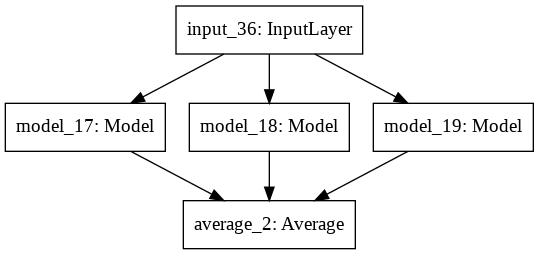

In [86]:
def get_model():
  inputs = keras.Input(shape = (128,))
  outputs = layers.Dense(1)(inputs)
  model = keras.Model(inputs , outputs)
  return model


model1 = get_model() #모델 인스턴스 생성
model2 = get_model() #모델 인스턴스 생성
model3 = get_model() #모델 인스턴스 생성

#앙상블 모델
inputs = keras.Input(shape = (128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)

outputs = layers.average([y1, y2, y3]) #3개를 평균 위함
ensemble=model = keras.Model(inputs = inputs, outputs = outputs)

keras.utils.plot_model(model, "ensemble_model.png")#그래프로 가시화

* input이 여러개인경우는 정형화 된 데이터가 여러개인경우?

# 복잡한 그래프 위상 조작하기

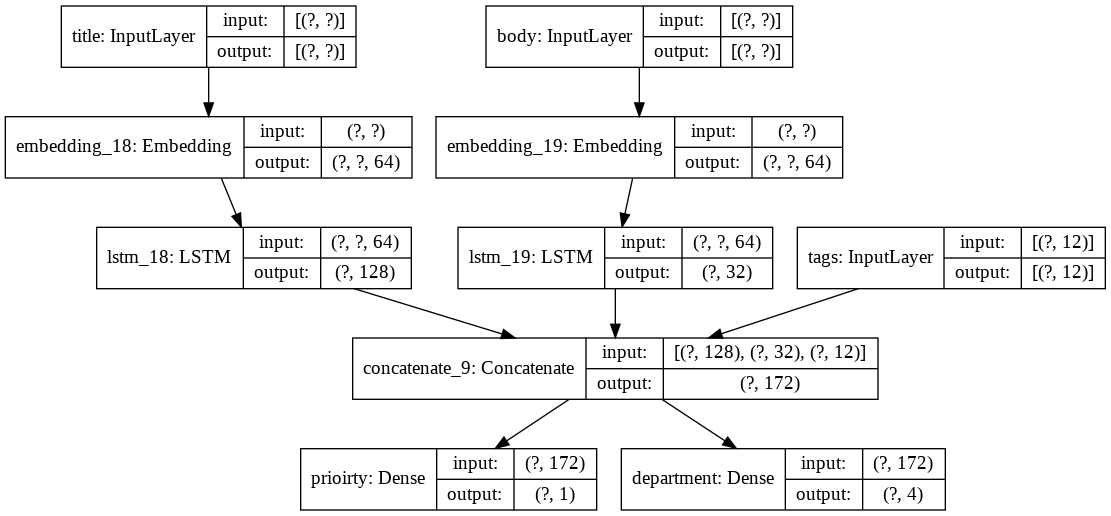

In [87]:
num_tags = 12
num_words = 10000
num_departments = 4

title_input = keras.Input(shape=(None, ), name = "title")
body_input = keras.Input(shape = (None, ), name = "body")
tags_input = keras.Input(shape = (num_tags, ), name = "tags")

title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

x = layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, name = "prioirty")(x)
department_pred = layers.Dense(num_departments, name = "department")(x)

model = keras.Model(inputs = [title_input, body_input, tags_input], outputs = [priority_pred, department_pred])

keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes = True)

# 복잡한 그래프 위상 조작하기

In [88]:
model.compile(optimizer = keras.optimizers.RMSprop(1e-3),
              loss = {"prioirty" : keras.losses.BinaryCrossentropy(from_logits = True),
                      "department" : keras.losses.CategoricalCrossentropy(from_logits = True)},
              loss_weights = [1.0, 0.2])

In [91]:
#input data
title_data = np.random.randint(num_words, size = (1280, 10))
body_data = np.random.randint(num_words, size = (1280, 100))
tags_data = np.random.randint(2, size = (1280, num_tags)).astype("float32")

#target data
priority_targets = np.random.random(size = (1280, 1))
dept_targets = np.random.randint(2, size = (1280, num_departments))

model.fit(
    {"title" : title_data, "body" : body_data, "tags" : tags_data}, 
    {"prioirty": priority_targets, "department" : dept_targets}, 
    epochs = 2,
    batch_size = 32
)

Epoch 1/2
40/40 [==============================] - 2s 56ms/step - loss: 1.2774 - prioirty_loss: 0.6980 - department_loss: 2.8972
Epoch 2/2
40/40 [==============================] - 2s 52ms/step - loss: 1.2697 - prioirty_loss: 0.6969 - department_loss: 2.8639


# Toy ResNet model

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_68 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_68[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 9, 9, 64)     0           conv2d_69[0][0]                  
_________________________________________________________________________________________

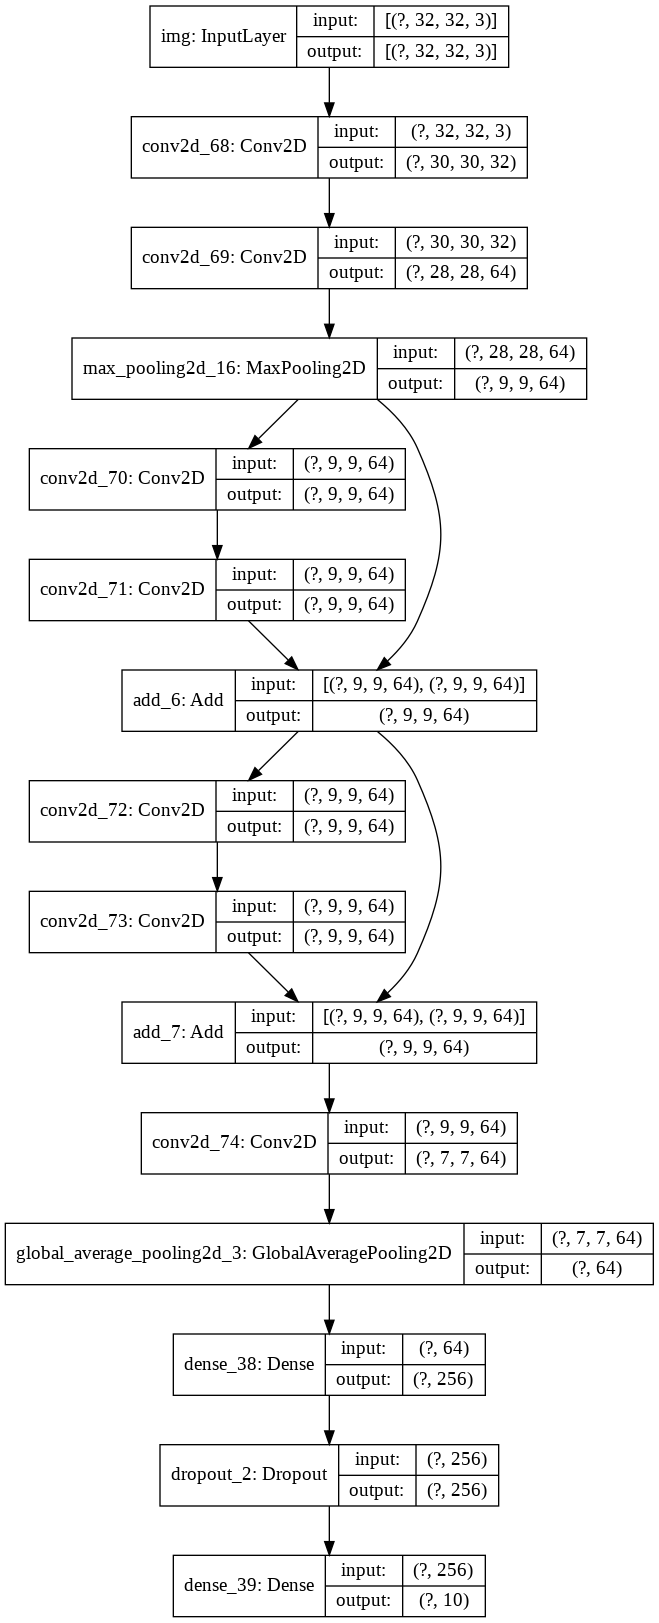

In [99]:
inputs = keras.Input(shape = (32, 32, 3), name = "img")
x = layers.Conv2D(32, 3, activation = 'relu')(inputs)
x = layers.Conv2D(64, 3, activation = 'relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation = 'relu', padding = "same")(block_1_output)
x = layers.Conv2D(64, 3, activation = 'relu', padding = "same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation = 'relu', padding = "same")(block_2_output)
x = layers.Conv2D(64, 3, activation = 'relu', padding = "same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation = 'relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name = "toy_resnet")
model.summary()

keras.utils.plot_model(model, "Toy_ResNet_model.png", show_shapes = True)

# Toy ResNet model
* CIFAR10 데이터 기반 학습

In [102]:
(x_trian, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer = keras.optimizers.RMSprop(1e-3),
              loss = keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics = ["acc"])

model.fit(x_train[:1000], y_train[:1000], batch_size = 64, epochs = 1, validation_split = 0.2)

13/13 [==============================] - 4s 310ms/step - loss: 8.7730 - acc: 0.1175 - val_loss: 2.2733 - val_acc: 0.1850
